# Learning goals: 
Data integration and redundancy

# Data:

 
 For this lab, we will work on a solar power generation dataset. This data comes from https://www.kaggle.com/anikannal/solar-power-generation-data?select=Plant_1_Generation_Data.csv
 
There are two sources of data: generation data and sensor data. The generation data comes from 22 invertors and sensor data comes from 1 sensor. The data is collected in 34 days. We would like to see if:
 
 - there is a relationship between temperature and power generation
 - there is a relationship between irradiation and power generation
 - there is a relationship between temperature and irritation


### Import Required modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
generation_df = pd.read_csv('Generation_Data.csv')
generation_df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


- DC_POWER: Amount of DC power generated by the inverter (source_key) in this 15 minute interval. Units - kW.
- AC_POWER: Amount of AC power generated by the inverter (source_key) in this 15 minute interval. Units - kW.
- DAILY_YIELD: Daily yield is a cumulative sum of power generated on that day, till that point in time.
- TOTAL_YIELD: This is the total yield for the inverter till that point in time.

We remove Daily_Yeild and Total_Yeild as they are irrelavant to our analysis. Plat_ID is also removed because it is the same valye all accros.


In [47]:
generation_df.PLANT_ID.unique()

array([4135001], dtype=int64)

In [48]:
generation_df.drop(columns= ['PLANT_ID','DAILY_YIELD','TOTAL_YIELD'], inplace=True)
generation_df

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER
0,15-05-2020 00:00,1BY6WEcLGh8j5v7,0.0,0.0
1,15-05-2020 00:00,1IF53ai7Xc0U56Y,0.0,0.0
2,15-05-2020 00:00,3PZuoBAID5Wc2HD,0.0,0.0
3,15-05-2020 00:00,7JYdWkrLSPkdwr4,0.0,0.0
4,15-05-2020 00:00,McdE0feGgRqW7Ca,0.0,0.0
...,...,...,...,...
68773,17-06-2020 23:45,uHbuxQJl8lW7ozc,0.0,0.0
68774,17-06-2020 23:45,wCURE6d3bPkepu2,0.0,0.0
68775,17-06-2020 23:45,z9Y9gH1T5YWrNuG,0.0,0.0
68776,17-06-2020 23:45,zBIq5rxdHJRwDNY,0.0,0.0


Are DC_Power and AC_Power too different? Let's see.

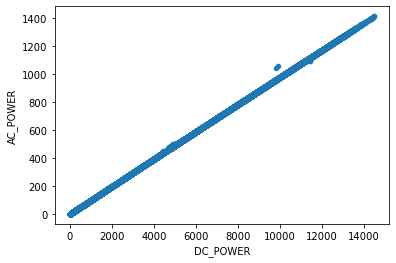

In [49]:
generation_df.plot(kind='scatter', x='DC_POWER',y='AC_POWER')

In [50]:
generation_df[['DC_POWER','AC_POWER']].corr()

,DC_POWER,AC_POWER
DC_POWER,1.000000,0.999996
AC_POWER,0.999996,1.000000


Almost 100% corelated! We keeo AC_power.

In [51]:
generation_df.drop(columns= ['DC_POWER'], inplace=True)
generation_df

,DATE_TIME,SOURCE_KEY,AC_POWER
0,15-05-2020 00:00,1BY6WEcLGh8j5v7,0.0
1,15-05-2020 00:00,1IF53ai7Xc0U56Y,0.0
2,15-05-2020 00:00,3PZuoBAID5Wc2HD,0.0
3,15-05-2020 00:00,7JYdWkrLSPkdwr4,0.0
4,15-05-2020 00:00,McdE0feGgRqW7Ca,0.0
...,...,...,...
68773,17-06-2020 23:45,uHbuxQJl8lW7ozc,0.0
68774,17-06-2020 23:45,wCURE6d3bPkepu2,0.0
68775,17-06-2020 23:45,z9Y9gH1T5YWrNuG,0.0
68776,17-06-2020 23:45,zBIq5rxdHJRwDNY,0.0


In [52]:
# calculate sum of all the generated power in the plant
generation_df.groupby('DATE_TIME').AC_POWER.sum()

DATE_TIME
01-06-2020 00:00    0.0
01-06-2020 00:15    0.0
01-06-2020 00:30    0.0
01-06-2020 00:45    0.0
01-06-2020 01:00    0.0
                   ... 
31-05-2020 22:45    0.0
31-05-2020 23:00    0.0
31-05-2020 23:15    0.0
31-05-2020 23:30    0.0
31-05-2020 23:45    0.0
Name: AC_POWER, Length: 3158, dtype: float64

In [53]:
generation_df = pd.DataFrame(generation_df.groupby('DATE_TIME').AC_POWER.sum())
generation_df

,AC_POWER
DATE_TIME,
01-06-2020 00:00,0.0
01-06-2020 00:15,0.0
01-06-2020 00:30,0.0
01-06-2020 00:45,0.0
01-06-2020 01:00,0.0
...,...
31-05-2020 22:45,0.0
31-05-2020 23:00,0.0
31-05-2020 23:15,0.0


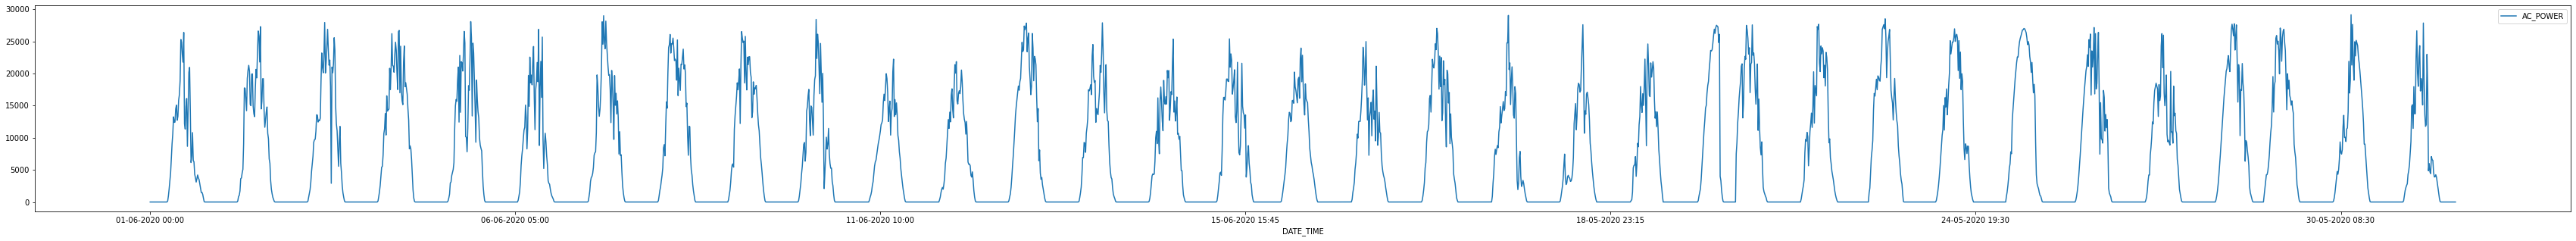

In [54]:
generation_df.plot(figsize=(60,5))

In [61]:
sensor_df = pd.read_csv('Weather_Sensor_Data.csv')
sensor_df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


- AMBIENT_TEMPERATURE: This is the ambient temperature at the plant.
- MODULE_TEMPERATURE: There's a module (solar panel) attached to the sensor panel. This is the temperature reading for that module.
- IRRADIATION: Amount of irradiation for the 15 minute interval.    

PLANT_ID and SOURCE_KEY are removed as they have the same value across the sensor_df.

In [62]:
sensor_df.SOURCE_KEY.unique()

array(['HmiyD2TTLFNqkNe'], dtype=object)

In [63]:
sensor_df.PLANT_ID.unique()

array([4135001], dtype=int64)

In [64]:
sensor_df.drop(columns=['PLANT_ID','SOURCE_KEY'],inplace=True)
sensor_df

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,24.621525,22.165423,0.0
...,...,...,...,...
3177,2020-06-17 22:45:00,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,21.969495,20.734963,0.0


Which Temperature to keep? AMBIENT_TEMPERATURE or MODULE_TEMPERATURE? 

Let's check if they carry the same information:

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE
AMBIENT_TEMPERATURE,1.000000,0.853778
MODULE_TEMPERATURE,0.853778,1.000000


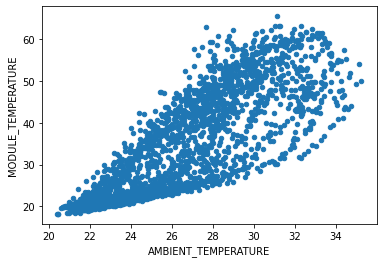

In [66]:
sensor_df.plot(kind='scatter', x='AMBIENT_TEMPERATURE', y='MODULE_TEMPERATURE')
sensor_df[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE']].corr()

The do have high level of co-linearity. But wich one to keep then?

Let's see whichone predicts irradiation better.

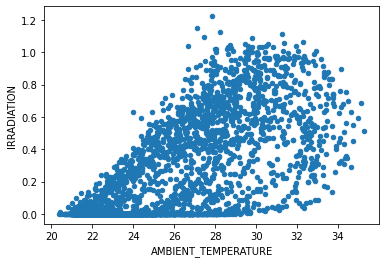

                     AMBIENT_TEMPERATURE  IRRADIATION
AMBIENT_TEMPERATURE             1.000000     0.722999
IRRADIATION                     0.722999     1.000000


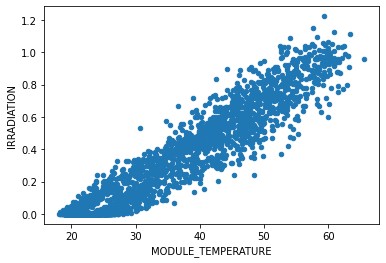

                    MODULE_TEMPERATURE  IRRADIATION
MODULE_TEMPERATURE            1.000000     0.961566
IRRADIATION                   0.961566     1.000000


In [67]:
temp_types = ['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE']

for tt in temp_types:
    sensor_df.plot(kind='scatter', x=tt, y='IRRADIATION')
    plt.show()
    print(sensor_df[[tt,'IRRADIATION']].corr())
    

We keep MODULE_TEMPERATURE. 

In [68]:
sensor_df.drop(columns=['AMBIENT_TEMPERATURE'],inplace=True)
sensor_df

,DATE_TIME,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,22.857507,0.0
1,2020-05-15 00:15:00,22.761668,0.0
2,2020-05-15 00:30:00,22.592306,0.0
3,2020-05-15 00:45:00,22.360852,0.0
4,2020-05-15 01:00:00,22.165423,0.0
...,...,...,...
3177,2020-06-17 22:45:00,21.480377,0.0
3178,2020-06-17 23:00:00,21.389024,0.0
3179,2020-06-17 23:15:00,20.709211,0.0
3180,2020-06-17 23:30:00,20.734963,0.0


In [70]:
sensor_df = sensor_df.set_index('DATE_TIME',drop=True)
sensor_df

,MODULE_TEMPERATURE,IRRADIATION
DATE_TIME,,
2020-05-15 00:00:00,22.857507,0.0
2020-05-15 00:15:00,22.761668,0.0
2020-05-15 00:30:00,22.592306,0.0
2020-05-15 00:45:00,22.360852,0.0
2020-05-15 01:00:00,22.165423,0.0
...,...,...
2020-06-17 22:45:00,21.480377,0.0
2020-06-17 23:00:00,21.389024,0.0
2020-06-17 23:15:00,20.709211,0.0


In [71]:
integrated_df = sensor_df.join(generation_df)
integrated_df

,MODULE_TEMPERATURE,IRRADIATION,AC_POWER
DATE_TIME,,,
2020-05-15 00:00:00,22.857507,0.0,NaN
2020-05-15 00:15:00,22.761668,0.0,NaN
2020-05-15 00:30:00,22.592306,0.0,NaN
2020-05-15 00:45:00,22.360852,0.0,NaN
2020-05-15 01:00:00,22.165423,0.0,NaN
...,...,...,...
2020-06-17 22:45:00,21.480377,0.0,NaN
2020-06-17 23:00:00,21.389024,0.0,NaN
2020-06-17 23:15:00,20.709211,0.0,NaN


Why this is not working? let's investigate. 

In [73]:
sensor_df.head()

,MODULE_TEMPERATURE,IRRADIATION
DATE_TIME,,
2020-05-15 00:00:00,22.857507,0.0
2020-05-15 00:15:00,22.761668,0.0
2020-05-15 00:30:00,22.592306,0.0
2020-05-15 00:45:00,22.360852,0.0
2020-05-15 01:00:00,22.165423,0.0


In [74]:
generation_df.head()

,AC_POWER
DATE_TIME,
01-06-2020 00:00,0.0
01-06-2020 00:15,0.0
01-06-2020 00:30,0.0
01-06-2020 00:45,0.0
01-06-2020 01:00,0.0


The data_time formating of the two data_sources are different. Let's change the date_time formating of sensor_df to generation_df.


In [82]:
def ReforamtDateTime(v):
    Year = v[:4]
    Month = v[5:7]
    Day = v[8:10]
    
    Hour = v[11:13]
    Min = v[14:16]
    
    return '{}-{}-{} {}:{}'.format(Day,Month,Year, Hour,Min)

In [91]:
sensor_df=sensor_df.reset_index()
sensor_df

,DATE_TIME,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,22.857507,0.0
1,2020-05-15 00:15:00,22.761668,0.0
2,2020-05-15 00:30:00,22.592306,0.0
3,2020-05-15 00:45:00,22.360852,0.0
4,2020-05-15 01:00:00,22.165423,0.0
...,...,...,...
3177,2020-06-17 22:45:00,21.480377,0.0
3178,2020-06-17 23:00:00,21.389024,0.0
3179,2020-06-17 23:15:00,20.709211,0.0
3180,2020-06-17 23:30:00,20.734963,0.0


In [93]:
sensor_df.DATE_TIME=sensor_df.DATE_TIME.apply(ReforamtDateTime)
sensor_df

,DATE_TIME,MODULE_TEMPERATURE,IRRADIATION
0,15-05-2020 00:00,22.857507,0.0
1,15-05-2020 00:15,22.761668,0.0
2,15-05-2020 00:30,22.592306,0.0
3,15-05-2020 00:45,22.360852,0.0
4,15-05-2020 01:00,22.165423,0.0
...,...,...,...
3177,17-06-2020 22:45,21.480377,0.0
3178,17-06-2020 23:00,21.389024,0.0
3179,17-06-2020 23:15,20.709211,0.0
3180,17-06-2020 23:30,20.734963,0.0


In [96]:
sensor_df = sensor_df.set_index('DATE_TIME',drop=True)
sensor_df

,MODULE_TEMPERATURE,IRRADIATION
DATE_TIME,,
15-05-2020 00:00,22.857507,0.0
15-05-2020 00:15,22.761668,0.0
15-05-2020 00:30,22.592306,0.0
15-05-2020 00:45,22.360852,0.0
15-05-2020 01:00,22.165423,0.0
...,...,...
17-06-2020 22:45,21.480377,0.0
17-06-2020 23:00,21.389024,0.0
17-06-2020 23:15,20.709211,0.0


In [97]:
integrated_df = sensor_df.join(generation_df)
integrated_df

,MODULE_TEMPERATURE,IRRADIATION,AC_POWER
DATE_TIME,,,
15-05-2020 00:00,22.857507,0.0,0.0
15-05-2020 00:15,22.761668,0.0,0.0
15-05-2020 00:30,22.592306,0.0,0.0
15-05-2020 00:45,22.360852,0.0,0.0
15-05-2020 01:00,22.165423,0.0,0.0
...,...,...,...
17-06-2020 22:45,21.480377,0.0,0.0
17-06-2020 23:00,21.389024,0.0,0.0
17-06-2020 23:15,20.709211,0.0,0.0


In [98]:
integrated_df.corr()

,MODULE_TEMPERATURE,IRRADIATION,AC_POWER
MODULE_TEMPERATURE,1.000000,0.961566,0.961011
IRRADIATION,0.961566,1.000000,0.995864
AC_POWER,0.961011,0.995864,1.000000


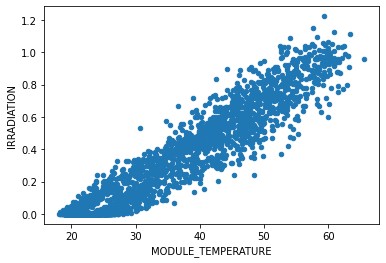

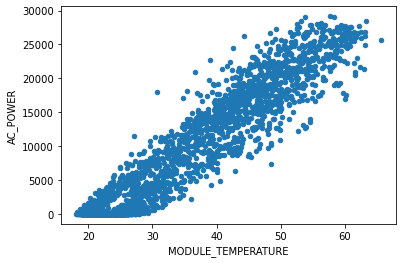

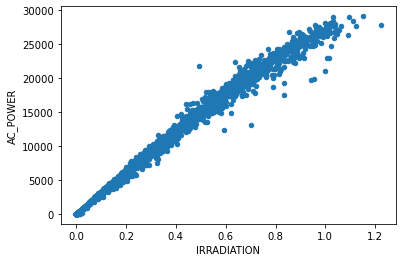

In [103]:
columns = integrated_df.columns
for i,att1 in enumerate(columns):
    for ii in range(i+1,3):
        att2 = columns[ii]
        integrated_df.plot(kind='scatter',x=att1,y=att2)
        plt.show()

The answer to all three questions are yes.